In [1]:
from ddeint import ddeint
import numpy as NP;
from pylab import figure, plot, xlabel, ylabel, legend, title, savefig
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



##  @brief      This class is designed to produce numerical simulations of
#               trajectories in the fixed delay Schnakenberg ODE system:
#               \f$ \frac{du}{dt}(t) = a - u(t) + u^2(t-\tau)v(t-\tau) \f$
#               \f$ \frac{dv}{dt}(t) = b - u^2(t-\tau)v(t-\tau) \f$, for 
#               a given set of parameters.
class FixedDelaySchnakenbergSimulator:
    
    ##  @brief              The constructor of this class.
    #   @param  a           This must be a value of type double, which
    #                       corresponds to the value of the a coefficient
    #                       which will be used in the governing equation:
    #                       \f$ \frac{du}{dt}(t) = a - u(t) + 
    #                       u^2(t-\tau)v(t-tau) \f$.
    #   @param  b           This must be a value of type double, which
    #                       corresponds to the value of the b coefficient
    #                       which will be used in the govenring equation:
    #                       \f$ \frac{dv}{dt}(t) = b - u^2(t-\tau)v(t-\tau)
    #                       \f$.
    #   @param t_values     This must be an array of type double, whose 
    #                       entries are all >=0. This argument corresponds
    #                       to the values in time at which we which we wish
    #                       to determine the value of u(t) and v(t) in our
    #                       trajectory simulations.
    #   @param tau          This must be a value of type double which is >0
    #                       and corresponds to the time delay which will be
    #                       used in the governing equations.
    def __init__(self, a, b, tau, t_values):
        self.__a = a;
        self.__b = b;
        self.__t_values = t_values;
        self.__tau = tau;
        
      

    ##  @brief      This method produces a simulation of a trajectory in
    #               the fixed time delay Schnakenberg ODE system, for a given
    #               set of initial conditions.    
    #   @param u0   This must be a function which takes a value of type double
    #               in the interval \f$ [-\tau, 0] \f$ and returns a value of
    #               type double. This corresponds to the initial data for the
    #               variable u, that we wish to use for the trajectory
    #               simulation.    
    #   @param v0   This must be a function which takes a value of type double
    #               in the interval \f$ [-\tau, 0] \f$ and returns a value of
    #               type double. This corresponds to the initial data for the
    #               variable v, that we wish to use for the trajectory
    #               simulation.    
    #   @return     This function returns two arrays of size n, where n
    #               is used to denote the length of the t_values array given
    #               to the constructor of this class. The first of these
    #               arrays corresponds to the values of u attained on the
    #               requested trajectory at the time values specified in the
    #               t_values array given to the constructor of this class.
    #               The second of these arrays corresponds to the value of v
    #               attained on the requested trajectory at the time values
    #               specified in the t_values array given to the constructor
    #               of this class.
    def generateTrajectory(self, u0, v0):
        initial_data = lambda t: (u0(t),v0(t));
        sol = ddeint(self.__evaluateModel, initial_data, self.__t_values);        
       
        u_sol = sol[:,0];
        v_sol = sol[:,1];
    
        return (u_sol, v_sol);


    ##  @brief      This method is used to compute the derivative of u and 
    #               v, using the fixed delay Schnakenberg kinetics for a
    #               given set of previous values of u and v.
    #   @param  y   This must be a function, which takes a value of type 
    #               double, in the interval \f$[t-\tau, t]\f$ and returns
    #               a one dimensional array of length 2, of type
    #               double. This corresponds to the previous values
    #               attained by the functions u and v, prior to time t.
    #   @param  t   This must be a value of type double, which corresponds
    #               to the time at which we wish to compute the derivative
    #               of u and v under the fixed time delay Schnakenberg
    #               kinetics.
    #   @return     This method returns a one dimensional array of length 2,
    #               of type double, which corresponds to the value of the
    #               derivatives of u and v respectively under the dynamics of
    #               fixed time delay Schnakenberg kinetics.
    def __evaluateModel(self, y, t):
        u, v = y(t);
        u_tau, v_tau = y(t-self.__tau);
        return NP.array([self.__a - u + (u_tau**2)*v_tau, 
                         self.__b - (u_tau**2)*v_tau]);

    

In [2]:
# Parameter values for the kinetics.
a=9
b=2
tau = 1;

In [3]:
# Compute the corresponding fixed point values for the system.
u_fixed = b+a;
v_fixed = b/((b+a)**2);

In [4]:
# The time values at which we wish to compute the values of the trajectories.
t_values = NP.linspace(0, 2, num=300);

In [5]:
# Create a trajectory simulator object with a fixed delay.
trajectory_simulator = FixedDelaySchnakenbergSimulator(a, b, tau, t_values);

In [6]:
# Simulate trajectories for the standard Schnakenberg system, using
# several different initial conditons.
u0_values = [lambda t: t, lambda t: 5*t, lambda t: 0.8*t];
v0_values = [lambda t: 2*t, lambda t: t,lambda t: 8*t];
u_sol_1, v_sol_1 = trajectory_simulator.generateTrajectory(u0_values[0], 
                                                         v0_values[0]);
u_sol_2, v_sol_2 = trajectory_simulator.generateTrajectory(u0_values[1],
                                                         v0_values[1]);
u_sol_3, v_sol_3 = trajectory_simulator.generateTrajectory(u0_values[2],
                                                         v0_values[2]);

In [7]:
# The style, colour and name settings for each line in the subsequent plots.
line_colours = ['r', 'g', 'b', 'y'];
line_styles = ['-', '-', '-', '--'];
line_settings = list(map(lambda x,y: x+y, line_colours, line_styles));
legend_strings = ['$u_0 = t, v_0 = 2t$',
        '$u_0 = 5t, v_0 = t$',
        '$u_0 = 0.8t, v_0 = 8t$',
        '$u_0 = u_*, v_0 = v_*$'];

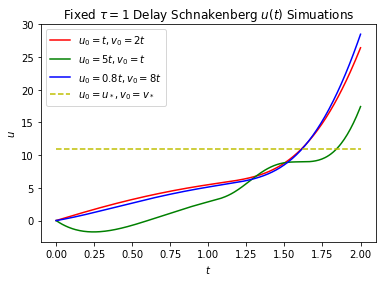

In [8]:
# Plot the u values over time.
figure(1);
xlabel('$t$');
ylabel('$u$');
plot(t_values, u_sol_1, line_settings[0]);
plot(t_values, u_sol_2, line_settings[1]);
plot(t_values, u_sol_3, line_settings[2]);
plot(t_values, NP.ones((len(t_values),1)) * u_fixed, line_settings[3]);
legend(legend_strings);
title(r'Fixed $\tau=$'+str(tau)+" Delay Schnakenberg $u(t)$ Simuations");

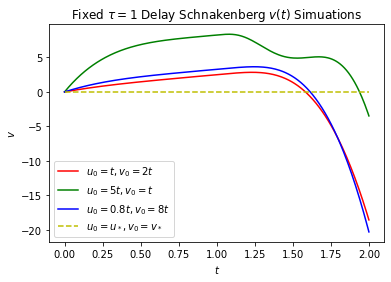

In [9]:
# Plot the v values over time.
figure(2);
xlabel('$t$');
ylabel('$v$');
plot(t_values, v_sol_1, line_settings[0]);
plot(t_values, v_sol_2, line_settings[1]);
plot(t_values, v_sol_3, line_settings[2]);
plot(t_values, NP.ones((len(t_values),1)) * v_fixed, line_settings[3]);
legend(legend_strings);
title(r'Fixed $\tau=$'+str(tau)+' Delay Schnakenberg $v(t)$ Simuations');

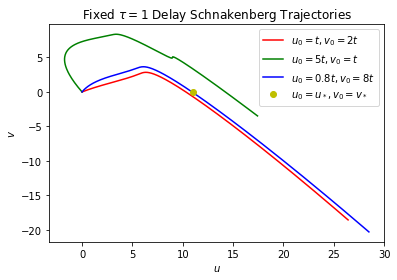

In [10]:
# Plot the trajectory curves in 2D.
figure(3);
xlabel('$u$');
ylabel('$v$');
plot(u_sol_1, v_sol_1, line_settings[0]);
plot(u_sol_2, v_sol_2, line_settings[1]);
plot(u_sol_3, v_sol_3, line_settings[2]);
plot([u_fixed], [v_fixed], line_colours[3]+'o');
legend(legend_strings);
title(r'Fixed $\tau=$'+str(tau)+' Delay Schnakenberg Trajectories');

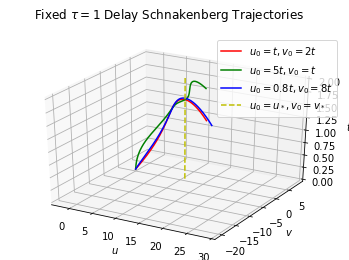

In [11]:
# Plot the trajecotry curves in 3D.
fig = plt.figure(4);
ax = plt.axes(projection='3d');
ax.set_xlabel('$u$');
ax.set_ylabel('$v$');
ax.set_zlabel('$t$');
ax.plot(u_sol_1, v_sol_1, t_values, line_settings[0]);
ax.plot(u_sol_2, v_sol_2, t_values, line_settings[1]);
ax.plot(u_sol_3, v_sol_3, t_values, line_settings[2]);
ax.plot(NP.ones((len(t_values), 1)) * u_fixed,
        NP.ones((len(t_values), 1)) * v_fixed,
        t_values, line_settings[3])
legend(legend_strings);
fig.suptitle(r'Fixed $\tau=$'+str(tau)+' Delay Schnakenberg Trajectories');